In [36]:
import pandas as pd
import numpy as np
import math
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
df = pd.read_csv('watermelon3_0b.csv')

In [15]:
dataframe = df.copy()
print(dataframe)
row, col = dataframe.shape
grouped = dataframe.groupby(by = '色泽').groups
#for key in grouped:
#print(key)
ind = grouped['乌黑']
print(ind)
dfv = dataframe.loc[ind]

    色泽  根蒂  敲声  纹理  脐部  触感 好瓜
0   青绿  蜷缩  浊响  清晰  凹陷  硬滑  是
1   乌黑  蜷缩  沉闷  清晰  凹陷  硬滑  是
2   乌黑  蜷缩  浊响  清晰  凹陷  硬滑  是
3   青绿  蜷缩  沉闷  清晰  凹陷  硬滑  是
4   浅白  蜷缩  浊响  清晰  凹陷  硬滑  是
5   青绿  稍蜷  浊响  清晰  稍凹  软粘  是
6   乌黑  稍蜷  浊响  稍糊  稍凹  软粘  是
7   乌黑  稍蜷  浊响  清晰  稍凹  硬滑  是
8   乌黑  稍蜷  沉闷  稍糊  稍凹  硬滑  否
9   青绿  硬挺  清脆  清晰  平坦  软粘  否
10  浅白  硬挺  清脆  模糊  平坦  硬滑  否
11  浅白  蜷缩  浊响  模糊  平坦  软粘  否
12  青绿  稍蜷  浊响  稍糊  凹陷  硬滑  否
13  浅白  稍蜷  沉闷  稍糊  凹陷  硬滑  否
14  乌黑  稍蜷  浊响  清晰  稍凹  软粘  否
15  浅白  蜷缩  浊响  模糊  平坦  硬滑  否
16  青绿  蜷缩  沉闷  稍糊  稍凹  硬滑  否
Int64Index([1, 2, 6, 7, 8, 14], dtype='int64')


In [3]:
"""
input:
    dataframe:样本集
    clas_atrr:决策属性
output:
    基尼值
"""
def Gini(dataframe, clas_atrr):
    row, col = dataframe.shape
    grouped = dataframe.groupby(by = clas_atrr).groups
    for key in grouped:
        gini = 1 - pow(len(grouped[key])/row, 2)
    
    return gini

In [22]:
"""
input:
    dataframe:样本集
    atrr:属性a
    clas_atrr:决策属性
output:
    属性atrr的基尼指数
"""
def Gini_index(dataframe, atrr, clas_atrr = 'clas'):
    row, col = dataframe.shape
    grouped = dataframe.groupby(by = atrr).groups
    gini_index = 0
    for key in grouped:
        #print(key)
        ind = grouped[key]
        #print(ind)
        dfv = dataframe.loc[ind]
        gini_index += (len(grouped[key])/row)*Gini(dfv, clas_atrr)
    
    return gini_index

In [24]:
"""
input:
    dataframe:样本集
    A:属性集
    clas_atrr:决策属性
output:
    以node 为根节点的一棵决策树
"""
def TreeGenerate(dataframe, A, clas_atrr, df):
#     decisionTree = {}
    #groupedA = dataframe.groupby(by = A).groups
    grouped = dataframe.groupby(by = clas_atrr).groups
#     clas = dataframe[clas_atrr]; del dataframe[clas_atrr]
    if len(grouped) == 1:
        return list(grouped.keys())[0]
    if len(A) == 0 :
        return list(grouped.keys())[0]
    groupedA = dataframe.groupby(by = A).groups
    if len(groupedA) == 1:
        return list(grouped.keys())[0]
    gini_index = []
    for atrr in A:
        gini_index.append(Gini_index(dataframe, atrr, clas_atrr))
    ind_best = gini_index.index(max(gini_index))
    a_best = A[gini_index.index(max(gini_index))]
    decisionTree = {a_best:{}}; del A[ind_best]
#     dataframe[clas_atrr] = clas
    grouped_a_best = dataframe.groupby(by = a_best).groups
    print(grouped_a_best)
    groupeddf = df.groupby(by = a_best).groups
    cnt = 0
    for key in groupeddf:
        #print(key)
        if not key in grouped_a_best:
            list_g = list(grouped.values())
            list_num = [len(v) for v in list_g]  
            decisionTree[a_best][key] = list(grouped.keys())[list_num.index(max([len(v) for v in list_g]))]
            continue
        subA = A[:]
        print(subA)
        ind = grouped_a_best[key]
        dfv = dataframe.loc[ind]
        #print(dfv)
        decisionTree[a_best][key] = TreeGenerate(dfv, subA, clas_atrr, df)
    
    return decisionTree

In [35]:
A = list(df);A.remove('好瓜')
print(A)
decisionTree = TreeGenerate(df, A, '好瓜', df)
print(decisionTree)

['色泽', '根蒂', '敲声', '纹理', '脐部', '触感']
{'硬滑': Int64Index([0, 1, 2, 3, 4, 7, 8, 10, 12, 13, 15, 16], dtype='int64'), '软粘': Int64Index([5, 6, 9, 11, 14], dtype='int64')}
['色泽', '根蒂', '敲声', '纹理', '脐部']
{'乌黑': Int64Index([1, 2, 7, 8], dtype='int64'), '浅白': Int64Index([4, 10, 13, 15], dtype='int64'), '青绿': Int64Index([0, 3, 12, 16], dtype='int64')}
['根蒂', '敲声', '纹理', '脐部']
{'稍蜷': Int64Index([7, 8], dtype='int64'), '蜷缩': Int64Index([1, 2], dtype='int64')}
['敲声', '纹理', '脐部']
{'稍凹': Int64Index([7, 8], dtype='int64')}
['敲声', '纹理']
{'沉闷': Int64Index([8], dtype='int64'), '浊响': Int64Index([7], dtype='int64')}
['纹理']
['纹理']
['敲声', '纹理', '脐部']
['根蒂', '敲声', '纹理', '脐部']
{'硬挺': Int64Index([10], dtype='int64'), '稍蜷': Int64Index([13], dtype='int64'), '蜷缩': Int64Index([4, 15], dtype='int64')}
['敲声', '纹理', '脐部']
['敲声', '纹理', '脐部']
['敲声', '纹理', '脐部']
{'浊响': Int64Index([4, 15], dtype='int64')}
['纹理', '脐部']
{'模糊': Int64Index([15], dtype='int64'), '清晰': Int64Index([4], dtype='int64')}
['脐部']
['脐部']
['根蒂', '敲声', 

In [37]:
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

#def createPlot():
#    fig = plt.figure(1, facecolor='white')
#    fig.clf()
#    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
#    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
#    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
#    plt.show()

def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

#createPlot(thisTree)

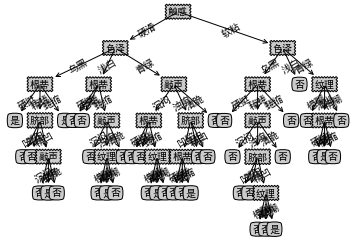

In [38]:
createPlot(decisionTree)